In [2]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog  # For HOG feature extraction
from sklearn.ensemble import RandomForestClassifier  # Random Forest Classifier
from sklearn.model_selection import train_test_split  # For splitting dataset into train and test
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report
import seaborn as sns


In [3]:
# Set dataset path 
dataset_path = "D:\\jupyter notebook python\\raw"

In [4]:
# Initialize lists to store HOG features and labels
X = []
y = []
image_paths = []  # To store image paths for display

In [5]:
# Load Real (ClientRaw) images
for folder in os.listdir(os.path.join(dataset_path, 'ClientRaw')):
    folder_path = os.path.join(dataset_path, 'ClientRaw', folder)
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            # Resize image to 128x64 pixels
            img_resized = cv2.resize(img, (128, 64))
            # Extract HOG features
            hog_features = hog(img_resized, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
            X.append(hog_features)
            y.append(0)  # Label for real images
            image_paths.append(img_path)  # Store the image path for visualization


In [6]:
# Load Fake (ImposterRaw) images
for folder in os.listdir(os.path.join(dataset_path, 'ImposterRaw')):
    folder_path = os.path.join(dataset_path, 'ImposterRaw', folder)
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            # Resize to match HOG input size
            img_resized = cv2.resize(img, (128, 64))
            # Extract HOG features
            hog_features = hog(img_resized, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
            X.append(hog_features)
            y.append(1)  # Label for fake images
            image_paths.append(img_path)  # Store the image path for visualization


In [7]:
# Convert X and y to NumPy arrays
X = np.array(X)
y = np.array(y)


In [19]:
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test, train_image_paths, test_image_paths = train_test_split(
    X, y, image_paths, test_size=0.3, random_state=42)


In [20]:

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
# Make predictions on the test set
predictions = rf_classifier.predict(X_test)

In [17]:

# Display first 5 predictions
print(f"First 10 Predictions: {predictions[:10]}")
print(f"First 10 True Labels: {y_test[:10]}")

First 10 Predictions: [1 1 0 1 1 1 0 1 0 0]
First 10 True Labels: [1 1 0 1 1 1 0 1 0 0]


In [18]:
# Model Evaluation
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")

Accuracy: 99.94%
Precision: 99.90%
Recall: 100.00%
F1-Score: 99.95%


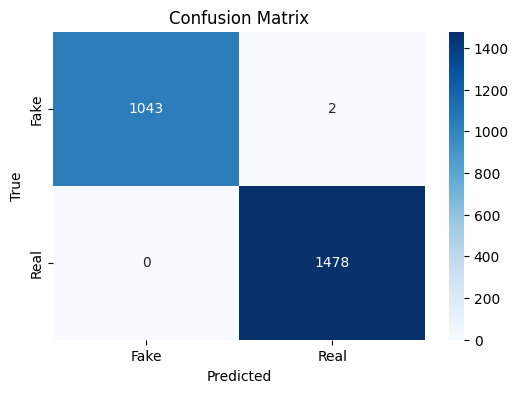

In [30]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Classification Report:
               precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      1045
        Real       1.00      1.00      1.00      1478

    accuracy                           1.00      2523
   macro avg       1.00      1.00      1.00      2523
weighted avg       1.00      1.00      1.00      2523



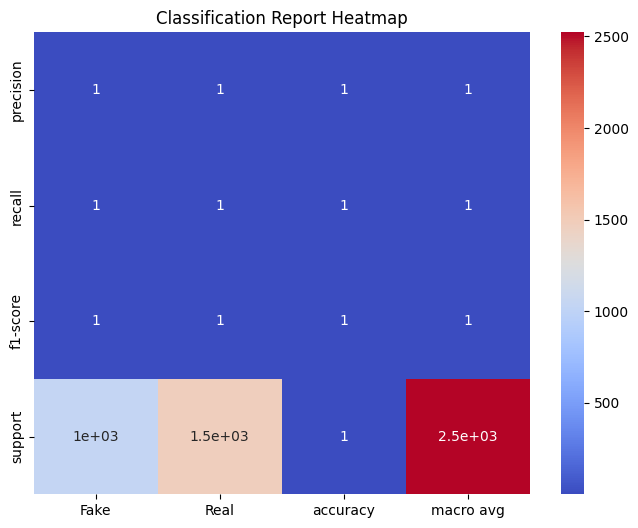

In [31]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, predictions, target_names=['Fake', 'Real']))

# Visualize Classification Report as a Heatmap
report = classification_report(y_test, predictions, target_names=['Fake', 'Real'], output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='coolwarm')
plt.title('Classification Report Heatmap')
plt.show()

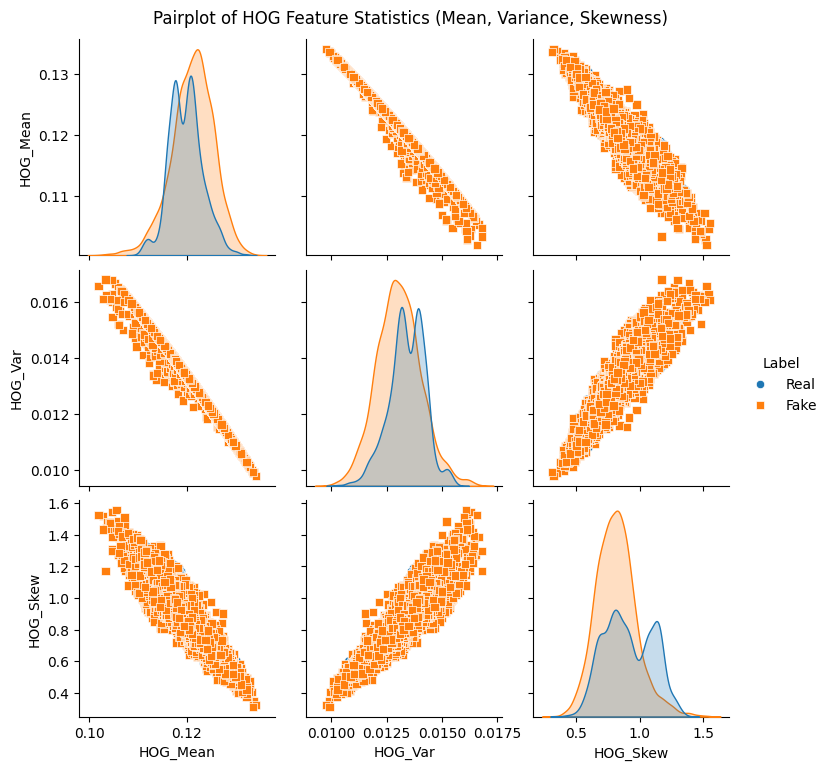

In [32]:
# Compute basic statistics (mean, variance, skewness) for HOG features as a demonstration
hog_mean = np.mean(X, axis=1)
hog_var = np.var(X, axis=1)
hog_skew = pd.DataFrame(X).skew(axis=1)

# Create a DataFrame for visualization
df_stats = pd.DataFrame({
    'HOG_Mean': hog_mean,
    'HOG_Var': hog_var,
    'HOG_Skew': hog_skew,
    'Label': ['Real' if label == 0 else 'Fake' for label in y]
})

# Pairplot using seaborn to visualize the relationships between HOG statistics and the label
sns.pairplot(df_stats, hue='Label', markers=["o", "s"], diag_kind='kde')
plt.suptitle('Pairplot of HOG Feature Statistics (Mean, Variance, Skewness)', y=1.02)
plt.show()

In [33]:
# Function to display predictions with images
def display_predictions(test_image_paths, predictions, num_images=10):
    for i in range(num_images):
        img = cv2.imread(test_image_paths[i])
        if img is not None:
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
            plt.title("Prediction: " + ("Real" if predictions[i] == 0 else "Fake"))
            plt.axis('off')
            plt.show()
        else:
            print(f"Image not found at: {test_image_paths[i]}")

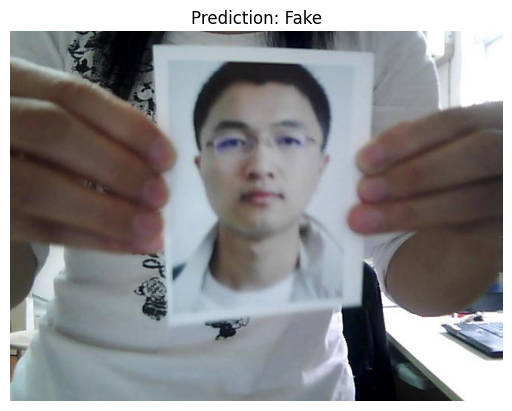

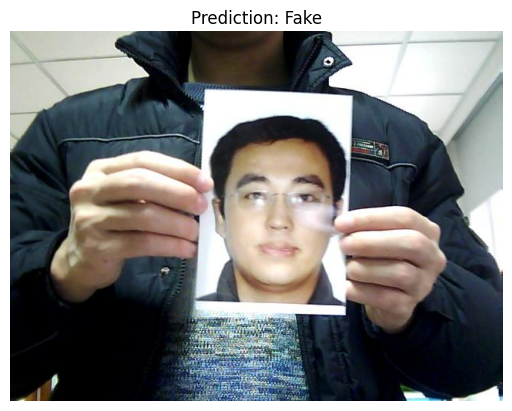

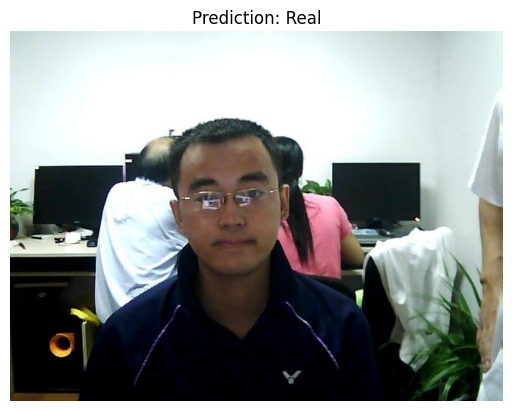

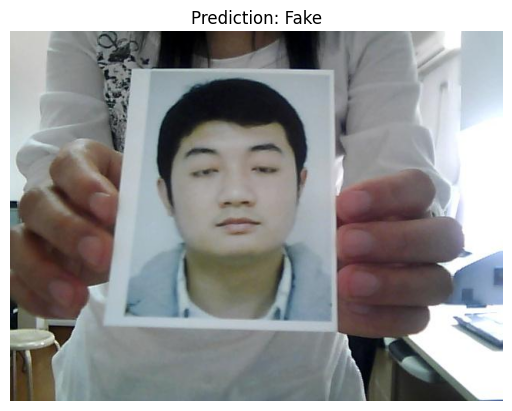

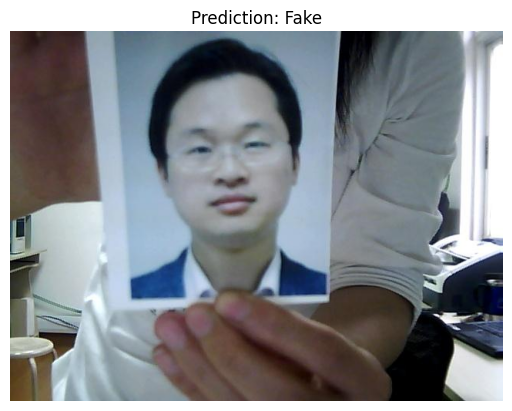

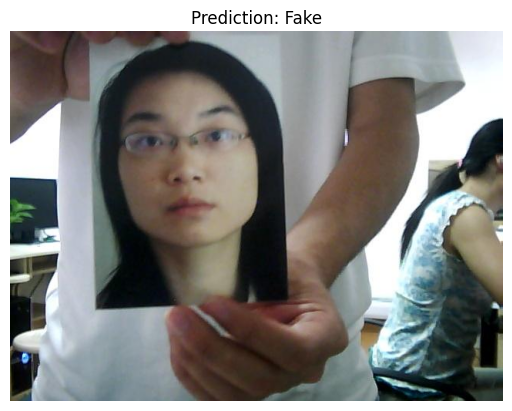

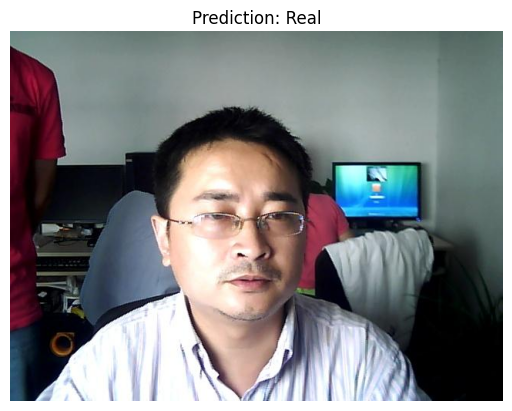

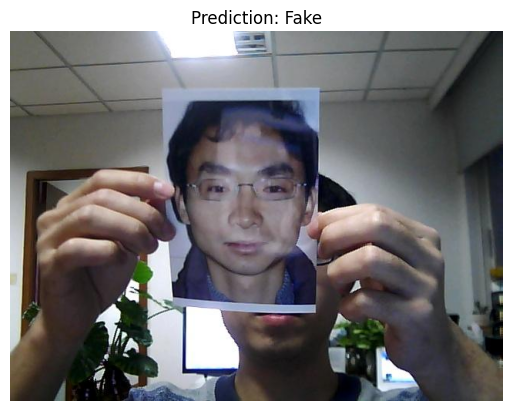

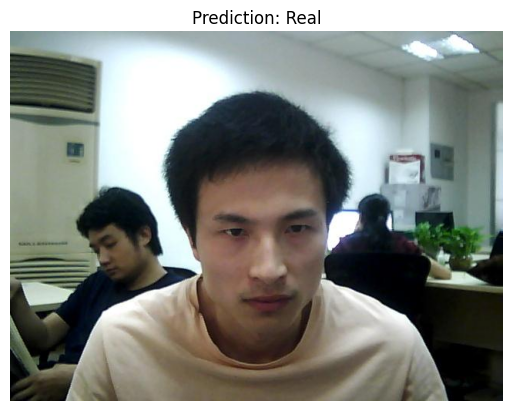

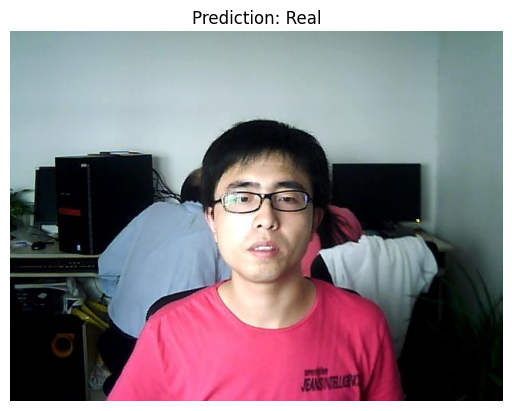

In [34]:
# Display some prediction results
display_predictions(test_image_paths, predictions, num_images=10)
